### Part(a)

Importing Modules and reading Input file

In [13]:
import numpy as np
import pandas as pd

In [14]:
data = pd.read_csv("mess_data.csv")

In [15]:
data.head()

,Day,Holiday,Meal_Type,Time_In,Time_Out,Time_Taken
0,Mon,0,Breakfast,930.0,951.0,21.0
1,Mon,0,Lunch,1258.0,1325.0,27.0
2,Mon,0,Snack,1721.0,1735.0,14.0
3,Mon,0,Dinner,2126.0,2145.0,19.0
4,Tue,0,Breakfast,844.0,859.0,15.0


### Exploratory Data Analysis

* Below code gives a quick summary of how our data look like along with some
statistical parameters like mean, deviation, min, max and percentile of each columns.
* Input data has $56$ Rows and $6$ columns with features like **Day, Holiday, Meal_type, Time_in, Time_out and Time_Taken** of each meal.
* Day and Meal_type column are not numerical.

In [16]:
data.describe()

,Holiday,Time_In,Time_Out,Time_Taken
count,56.000000,48.000000,48.000000,48.000000
mean,0.285714,1485.395833,1525.583333,22.479167
std,0.455842,461.916716,459.932596,5.531302
min,0.000000,831.000000,848.000000,12.000000
25%,0.000000,951.000000,1012.750000,18.750000
50%,0.000000,1351.500000,1416.500000,22.000000
75%,1.000000,2019.750000,2051.250000,26.000000
max,1.000000,2126.000000,2145.000000,35.000000


In [17]:
data.shape

(56, 6)

In [18]:
data.columns

Index(['Day', 'Holiday', 'Meal_Type', 'Time_In', 'Time_Out', 'Time_Taken'], dtype='object')

### Checking missing values

In [19]:
data.isnull().sum()

Day           0
Holiday       0
Meal_Type     0
Time_In       8
Time_Out      8
Time_Taken    8
dtype: int64

* As you can see, there are few missing values in the input data. We can not replace it with mean or any statistical parameters because timings are bounded to some range.
* Better choice would be to drop these rows, since number of nan values are less.


In [20]:
#dropping rows with nan values
data = data.dropna()
data.isnull().sum()

Day           0
Holiday       0
Meal_Type     0
Time_In       0
Time_Out      0
Time_Taken    0
dtype: int64

### Plotting some graph to see relation between features

In [21]:
y_breakfast = data.loc[data["Meal_Type"]=="Breakfast"]
y_breakfast

,Day,Holiday,Meal_Type,Time_In,Time_Out,Time_Taken
0,Mon,0,Breakfast,930.0,951.0,21.0
4,Tue,0,Breakfast,844.0,859.0,15.0
8,Wed,0,Breakfast,840.0,859.0,19.0
12,Thu,0,Breakfast,831.0,848.0,17.0
16,Fri,0,Breakfast,913.0,931.0,18.0
20,Sat,1,Breakfast,938.0,955.0,17.0
28,Mon,0,Breakfast,940.0,1002.0,22.0
32,Tue,0,Breakfast,948.0,1013.0,25.0
40,Thu,0,Breakfast,947.0,1012.0,25.0
44,Fri,0,Breakfast,843.0,902.0,19.0


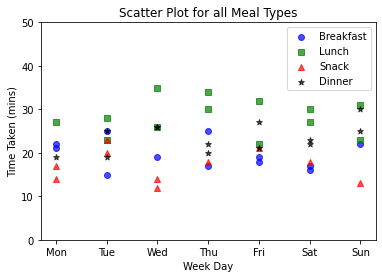

In [22]:
import matplotlib.pyplot as plt
import numpy as np
plt.ylim(0, 50)

# seperating dataframes according to Meal types
df_breakfast = data.loc[data["Meal_Type"]=="Breakfast"]
df_lunch = data.loc[data["Meal_Type"]=="Lunch"]
df_snack = data.loc[data["Meal_Type"]=="Snack"]
df_dinner = data.loc[data["Meal_Type"]=="Dinner"]

# Create a scatter plot for each dataset with different y-labels
plt.scatter(df_breakfast["Day"], df_breakfast["Time_Taken"], label='Breakfast', marker='o', color='blue', alpha=0.7)
plt.scatter(df_lunch["Day"], df_lunch['Time_Taken'], label='Lunch', marker='s', color='green', alpha=0.7)
plt.scatter(df_snack["Day"], df_snack['Time_Taken'], label='Snack', marker='^', color='red', alpha=0.7)
plt.scatter(df_dinner["Day"], df_dinner['Time_Taken'], label='Dinner', marker='*', color='black', alpha=0.7)

# Add labels and a legend
plt.xlabel('Week Day')
plt.ylabel('Time Taken (mins)')
plt.title('Scatter Plot for all Meal Types')
plt.legend()

# Show the plot
plt.show()


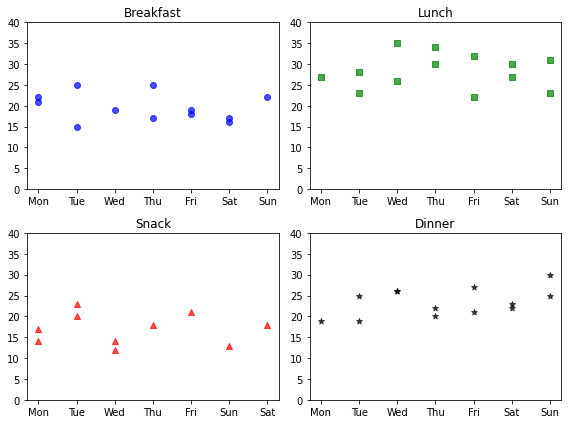

In [23]:
import matplotlib.pyplot as plt

# Create a figure and multiple subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))  # Create a 2x2 grid of subplots

# Now you can plot in each subplot and set different y-axis limits
axes[0, 0].scatter(df_breakfast["Day"], df_breakfast["Time_Taken"], label='Breakfast', marker='o', color='blue', alpha=0.7)
axes[0, 0].set_ylim(0, 40)

axes[0, 1].scatter(df_lunch["Day"], df_lunch['Time_Taken'], label='Lunch', marker='s', color='green', alpha=0.7)
axes[0, 1].set_ylim(0, 40)

axes[1, 0].scatter(df_snack["Day"], df_snack['Time_Taken'], label='Snack', marker='^', color='red', alpha=0.7)
axes[1, 0].set_ylim(0, 40)

axes[1, 1].scatter(df_dinner["Day"], df_dinner['Time_Taken'], label='Dinner', marker='*', color='black', alpha=0.7)
axes[1, 1].set_ylim(0, 40)

axes[0, 0].set_title('Breakfast')
axes[0, 1].set_title('Lunch')
axes[1, 0].set_title('Snack')
axes[1, 1].set_title('Dinner')

plt.tight_layout()

plt.show()


##Part(b)

* Since our data has categorical variable like Day and Meal_Type and target values are counts. For this data, linear regression is not a good model. Since we have to use Maximum Likelihood estimation **Poisson Regression** will work well this data.
* We will use _**Poisson Regression**_ for this problem.

In [24]:
df = pd.get_dummies(data)
df.head()

,Holiday,Time_In,Time_Out,Time_Taken,Day_Fri,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Meal_Type_Breakfast,Meal_Type_Dinner,Meal_Type_Lunch,Meal_Type_Snack
0,0,930.0,951.0,21.0,0,1,0,0,0,0,0,1,0,0,0
1,0,1258.0,1325.0,27.0,0,1,0,0,0,0,0,0,0,1,0
2,0,1721.0,1735.0,14.0,0,1,0,0,0,0,0,0,0,0,1
3,0,2126.0,2145.0,19.0,0,1,0,0,0,0,0,0,1,0,0
4,0,844.0,859.0,15.0,0,0,0,0,0,1,0,1,0,0,0


### Selecting features and splitting into train-test set

In [25]:
#Selecting feature and target variables
X = df.drop(columns="Time_Taken", axis=1)
y = df["Time_Taken"]

In [26]:
# Split your data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)

(38, 14)
(38,)


###Model training

In [27]:
from sklearn import linear_model

#Poisson regression
poisson = linear_model.PoissonRegressor(alpha=1, max_iter=10000)
poisson.fit(X_train,y_train)

c:\users\rahul-pc\appdata\local\programs\python\python39\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
c:\users\rahul-pc\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_glm\glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
c:\users\rahul-pc\appdata\local\programs\python\python39\lib\site-packages\sklearn\_loss\glm_distribution.py:323: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)


PoissonRegressor(alpha=1, max_iter=10000)

In [28]:
#linear Regression
linear = linear_model.LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

### Prediction and model evaluation

In [29]:
#prediction
y_pred_poisson = poisson.predict(X_test)
y_pred_linear = linear.predict(X_test)

In [30]:
#model evaluation
from sklearn.metrics import mean_squared_error, mean_poisson_deviance,r2_score

print("R2 score of Poisson Regression: ", r2_score(y_test,y_pred_poisson))
print("R2 score of linear Regression: ", r2_score(y_test,y_pred_linear))

print("Mean squared error of Poisson Regression: ", mean_squared_error(y_test,y_pred_poisson))
print("Mean squared error of linear Regression: ", mean_squared_error(y_test,y_pred_linear))

print("Mean poisson deviance of Poisson Regression: ", mean_poisson_deviance(y_test,y_pred_poisson))
print("Mean poisson deviance of linear Regression: ", mean_poisson_deviance(y_test,y_pred_linear))

R2 score of Poisson Regression:  -0.39227146814404334
R2 score of linear Regression:  0.5971320952515309
Mean squared error of Poisson Regression:  34.806786703601084
Mean squared error of linear Regression:  10.071697618711728
Mean poisson deviance of Poisson Regression:  1.6546298709275191
Mean poisson deviance of linear Regression:  0.5077203937837595


* Clearly, Poisson regression has less MSE and Mean Poisson deviance and more R2 Score compared to Linear regression. So choosing Poisson regression will give better predictions.